In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('Ecommerce Customers.csv')

### Displaying the data format

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data_1 = data.copy()

#### Regression type of data

In [5]:
data_1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
data.drop('Email', axis=1, inplace=True)
data.drop('Address', axis=1, inplace=True)

In [7]:
data.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [9]:
data['Avatar'].value_counts()

Avatar
SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: count, Length: 138, dtype: int64

<Axes: >

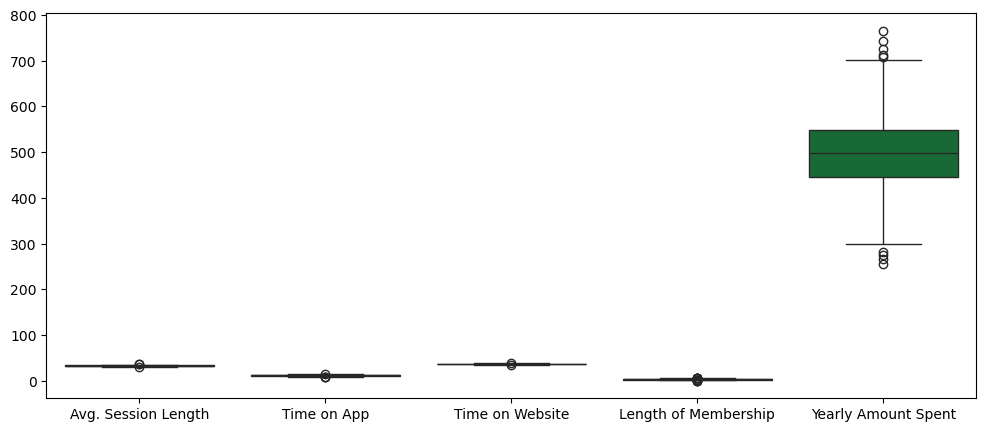

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data,palette='Greens')

In [11]:
# Q1 = data['Yearly Amount Spent'].quantile(0.25)
# Q3 = data['Yearly Amount Spent'].quantile(0.75)
# IQR = Q3 - Q1
# lb = Q1 - 1.5 * IQR
# ub = Q3 + 1.5 * IQR
# print(lb,ub)

In [12]:
# data.loc[data['Yearly Amount Spent'] < lb] = lb
# data.loc[data['Yearly Amount Spent'] > ub] = ub

In [13]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
data['Avatar'] = Label.fit_transform(data['Avatar'])

In [14]:
data.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,80,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
data.corr()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avatar,1.000000,0.030473,-0.018513,0.002808,0.013701,0.015608
Avg. Session Length,0.030473,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.018513,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,0.002808,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.013701,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.015608,0.355088,0.499328,-0.002641,0.809084,1.000000


### Splitting the Data for Training


In [16]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [17]:
X.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,132,34.497268,12.655651,39.577668,4.082621
1,25,31.926272,11.109461,37.268959,2.664034
2,6,33.000915,11.330278,37.110597,4.104543
3,114,34.305557,13.717514,36.721283,3.120179
4,80,33.330673,12.795189,37.536653,4.446308


In [18]:
print(y)

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [21]:
print(X_train.shape), print(X_test.shape)
print(y_train.shape), print(y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


(None, None)

### Using the Catboost Regressor from ML models

In [22]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()

In [23]:
model.fit(X_train,y_train)

Learning rate set to 0.035425
0:	learn: 80.2764822	total: 157ms	remaining: 2m 36s
1:	learn: 78.4096167	total: 172ms	remaining: 1m 25s
2:	learn: 76.6087321	total: 190ms	remaining: 1m 3s
3:	learn: 75.0627668	total: 216ms	remaining: 53.8s
4:	learn: 73.6048856	total: 226ms	remaining: 45.1s
5:	learn: 72.0325199	total: 231ms	remaining: 38.3s
6:	learn: 70.4839182	total: 236ms	remaining: 33.4s
7:	learn: 69.0262483	total: 239ms	remaining: 29.7s
8:	learn: 67.7636471	total: 243ms	remaining: 26.7s
9:	learn: 66.6126404	total: 246ms	remaining: 24.3s
10:	learn: 65.0981215	total: 249ms	remaining: 22.4s
11:	learn: 63.8917086	total: 254ms	remaining: 20.9s
12:	learn: 62.8772512	total: 256ms	remaining: 19.5s
13:	learn: 61.5631576	total: 259ms	remaining: 18.2s
14:	learn: 60.2634210	total: 263ms	remaining: 17.3s
15:	learn: 58.9594633	total: 266ms	remaining: 16.3s
16:	learn: 57.6839911	total: 269ms	remaining: 15.6s
17:	learn: 56.6358388	total: 272ms	remaining: 14.8s
18:	learn: 55.4587055	total: 275ms	remaini

### Model Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(round(mean_absolute_error(y_pred,y_test),2))

9.92


In [27]:
print(round(mean_squared_error(y_pred,y_test, squared=False),2))

13.29


### Using XGBoost Regressor from ML models

In [28]:
from xgboost import XGBRegressor
XG_model = XGBRegressor()

In [29]:
XG_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [30]:
y_pred_XG = XG_model.predict(X_test)

In [31]:
print(round(mean_absolute_error(y_pred_XG,y_test),2))

14.09


In [32]:
print(round(mean_squared_error(y_pred_XG,y_test, squared=False),2))

17.78


### Using Ensemble Methods from ML models

In [33]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
ran_model = RandomForestRegressor()
bag_model = BaggingRegressor()

In [34]:
ran_model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
bag_model.fit(X_train,y_train)

BaggingRegressor()

### Model Evaluation

In [36]:
y_pred_ran = ran_model.predict(X_test)

In [37]:
print(round(mean_absolute_error(y_pred_ran,y_test),2))

13.02


In [38]:
print(round(mean_squared_error(y_pred_ran,y_test, squared=False),2))

17.84


In [39]:
y_pred_bag = bag_model.predict(X_test)

In [40]:
print(round(mean_absolute_error(y_pred_bag,y_test),2))

13.63


In [41]:
print(round(mean_squared_error(y_pred_bag,y_test,squared=False),2))

18.25


### Using Linear Regression from ML models

In [42]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [43]:
lin.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [44]:
y_pred_lin = lin.predict(X_test)

In [45]:
print(round(mean_absolute_error(y_pred_lin,y_test),2))

8.34


In [46]:
print(round(mean_squared_error(y_pred_lin,y_test,squared=False),2))

10.83


In [54]:
print(len(y_pred_lin))

100


### Linear Regression model has predicted with less error (It is the optimal ML model so far)

### Building a Neural Network for prediction

In [47]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
seq = Sequential()

In [48]:
def Neural_network(seq):
    seq.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), input_shape = (X_train.shape[1],)))
    seq.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    seq.add(tf.keras.layers.Dropout(0.3))
    seq.add(tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    seq.add(tf.keras.layers.Dense(1, activation='linear'))

    seq.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae','mse'])
    checkpoint = ModelCheckpoint('Better_model.keras', monitor='val_loss', save_best_only= True)
    seq.fit(X_train,y_train,batch_size = 34, epochs = 250, callbacks = checkpoint)
Neural_network(seq)
                                 
       

C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 476.6993 - mae: 476.0028 - mse: 232816.3906
Epoch 2/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 441.6941 - mae: 441.0364 - mse: 201358.9688 
Epoch 3/250


C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 397.6330 - mae: 397.0058 - mse: 166333.4531  
Epoch 4/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 337.5692 - mae: 336.9633 - mse: 126827.9297 
Epoch 5/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.3903 - mae: 239.7952 - mse: 72120.7266 
Epoch 6/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180.1378 - mae: 179.5472 - mse: 45529.3789 
Epoch 7/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.6687 - mae: 171.0872 - mse: 42103.8242 
Epoch 8/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 149.0308 - mae: 148.4658 - mse: 32479.3535 
Epoch 9/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.0927 - mae: 140.5423 - mse: 29626.2324 
Epoch 10/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.4972 - mae: 118.9527 - mse: 21112.7168 
Epoch 11/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.7269 - mae: 108.1838 - mse: 17505.8008 
Epoch 12/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.1358 - mae: 95.59

In [49]:
seq

<Sequential name=sequential, built=True>

In [50]:
test_loss = seq.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 106.8660 - mae: 105.7674 - mse: 12065.3105  


In [51]:
y_pred_seq = seq.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [52]:
print(round(mean_absolute_error(y_pred_seq,y_test),2))

107.03


In [53]:
print(round(mean_squared_error(y_pred_seq,y_test, squared=False),2))

111.3


### Depending on the amount of epochs, the errors while using a built-in neural network varies.